In [1]:
from mealpy import SMA, GA, PSO, ABC, SOS
from knn.knn_problem import KnnMetaHeuristicProblem
from knn.knn_problem_bounds import problem_bounds, termination
from utils.visualize import plot_fitness
import pandas as pd

## Diabetes Dataset

In [2]:
diabetes_df = pd.read_csv("datasets/diabetes.csv")
attributes = diabetes_df.drop("Outcome", axis=1)
target = diabetes_df["Outcome"]

In [3]:
diabetes_problem = KnnMetaHeuristicProblem(attributes, target, problem_bounds)
diabetes_model = SOS.OriginalSOS(epoch=80)

In [4]:
diabetes_model.solve(diabetes_problem, termination=termination, seed=10)

2025/07/02 12:14:58 AM, INFO, mealpy.bio_based.SOS.OriginalSOS: OriginalSOS(epoch=80, pop_size=100)
2025/07/02 12:15:08 AM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 1, Current best: 0.7967479674796748, Global best: 0.7967479674796748, Runtime: 6.94373 seconds
2025/07/02 12:15:14 AM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 2, Current best: 0.8015873015873016, Global best: 0.8015873015873016, Runtime: 6.21898 seconds
2025/07/02 12:15:20 AM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 3, Current best: 0.8032786885245902, Global best: 0.8032786885245902, Runtime: 6.02473 seconds
2025/07/02 12:15:26 AM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 4, Current best: 0.8037383177570093, Global best: 0.8037383177570093, Runtime: 6.12235 seconds
2025/07/02 12:15:32 AM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 5, Current best: 0.8037383177570093, Global best: 0.8037383177570093, Runtime: 6.28351 sec

id: 154, target: Objectives: [0.80373832], Fitness: 0.8037383177570093, solution: [ 0.13824935 46.53737429  5.4999      0.5         1.          0.
  1.        ]

Best accuracy: 0.8037383177570093
Best parameters: 
{'test_size': 0.13824935051702286, 'n_neighbors': 47, 'leaf_size': 5, 'p': 1, 'weights': 'uniform', 'algorithm': 'auto', 'metric': 'manhattan'}


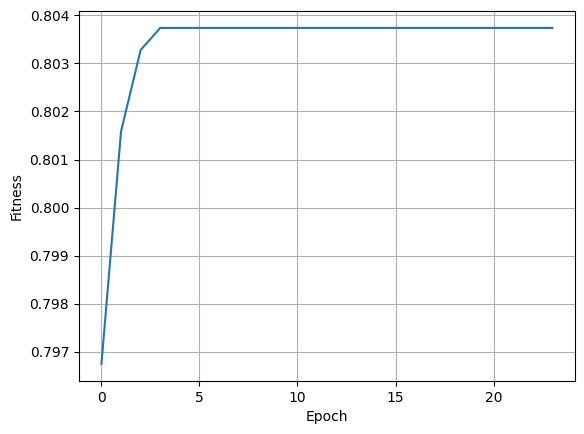

In [5]:
plot_fitness(diabetes_model)

## Titanic Dataset

In [6]:
titanic_df = pd.read_csv("datasets/titanic.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# Sonuca etki etmeyen değişkenler çıkarılır
titanic_df.drop(columns=["Name", "Ticket", "Cabin", "Embarked", "PassengerId"], inplace=True)

# Değişkenlerin veri tipi dönüştürülür
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 0, "female": 1})

# Null değerleri silinir
titanic_df.dropna(inplace=True)

In [8]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250


In [9]:
attributes = titanic_df.drop("Survived", axis=1)
target = titanic_df["Survived"]

titanic_problem = KnnMetaHeuristicProblem(attributes, target, problem_bounds)
titanic_model = ABC.OriginalABC(epoch=75, pop_size=100)
titanic_model.solve(titanic_problem, termination=termination)

2025/07/02 12:17:47 AM, INFO, mealpy.swarm_based.ABC.OriginalABC: OriginalABC(epoch=75, pop_size=100, n_limits=25)
2025/07/02 12:17:52 AM, INFO, mealpy.swarm_based.ABC.OriginalABC: >>>Problem: P, Epoch: 1, Current best: 0.8032786885245902, Global best: 0.8032786885245902, Runtime: 3.28648 seconds
2025/07/02 12:17:55 AM, INFO, mealpy.swarm_based.ABC.OriginalABC: >>>Problem: P, Epoch: 2, Current best: 0.8032786885245902, Global best: 0.8032786885245902, Runtime: 3.43100 seconds
2025/07/02 12:17:59 AM, INFO, mealpy.swarm_based.ABC.OriginalABC: >>>Problem: P, Epoch: 3, Current best: 0.8064516129032258, Global best: 0.8064516129032258, Runtime: 3.05671 seconds
2025/07/02 12:18:02 AM, INFO, mealpy.swarm_based.ABC.OriginalABC: >>>Problem: P, Epoch: 4, Current best: 0.8064516129032258, Global best: 0.8064516129032258, Runtime: 3.10346 seconds
2025/07/02 12:18:04 AM, INFO, mealpy.swarm_based.ABC.OriginalABC: >>>Problem: P, Epoch: 5, Current best: 0.8064516129032258, Global best: 0.8064516129032

id: 5555, target: Objectives: [0.81081081], Fitness: 0.8108108108108109, solution: [ 0.25780502 16.7024965   4.47763645  3.36094405  1.          0.
  0.        ]

Best accuracy: 0.8108108108108109
Best parameters: 
{'test_size': 0.25780501719457827, 'n_neighbors': 17, 'leaf_size': 4, 'p': 3, 'weights': 'uniform', 'algorithm': 'auto', 'metric': 'euclidean'}


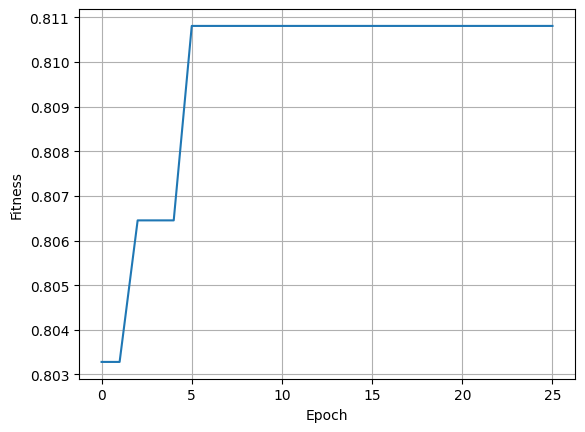

In [10]:
plot_fitness(titanic_model)